In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* pkl 불러오기

In [4]:
df = pd.read_pickle('data/main.pkl')
#Dog = pd.read_pickle('data/Dog.pkl')
#Cat = pd.read_pickle('data/Cat.pkl')

In [5]:
df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Breed2,numCol,Type
26724,A702446,Unnamed,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,30,Domestic Shorthair Mix,dark,Mix,1,Cat
26725,A718934,Unnamed,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,90,Domestic Shorthair Mix,dark,Mix,0,Cat
26726,A698128,Named,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,1460,Old English Bulldog Mix,light,Mix,1,Cat
26727,A677478,Unnamed,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,28,Domestic Shorthair Mix,dark,Mix,0,Cat
26728,A706629,Unnamed,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,365,Domestic Shorthair Mix,dark,Mix,1,Cat


## 더미화

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['OutcomeType'] = encoder.fit_transform(df['OutcomeType'])
df['Name'] = encoder.fit_transform(df['Name'])
df['SexuponOutcome'] = encoder.fit_transform(df['SexuponOutcome'])
df['Type'] = encoder.fit_transform(df['Type'])
df['Breed2'] = encoder.fit_transform(df['Breed2'])
df['Color'] = encoder.fit_transform(df['Color'])
df['Breed'] = encoder.fit_transform(df['Breed'])

In [7]:
df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Breed2,numCol,Type
26724,A702446,1,2015-05-14 11:56:00,4,Partner,Cat,1,30,638,1,0,1,0
26725,A718934,1,2016-01-20 18:59:00,4,SCRP,Cat,3,90,638,1,0,0,0
26726,A698128,0,2015-03-09 13:33:00,0,NaN,Dog,2,1460,1021,2,0,1,0
26727,A677478,1,2014-04-27 12:22:00,4,Partner,Cat,1,28,638,1,0,0,0
26728,A706629,1,2015-07-02 09:00:00,4,SCRP,Cat,1,365,638,1,0,1,0


In [8]:
X = df[['Name', 'AgeuponOutcome', 'SexuponOutcome', 'Type', 'Breed']]
y = df['OutcomeType']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## 분류나무 실행

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)

In [9]:
clf = clf.fit(X_train, y_train)

In [10]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.626259602913
0.634295974862


In [11]:
clf.feature_importances_

array([ 0.0775546 ,  0.30354099,  0.61124013,  0.00083203,  0.00683224])

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
forest = RandomForestClassifier(n_estimators=300, random_state=2, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [14]:
X.columns

Index(['Name', 'AgeuponOutcome', 'SexuponOutcome', 'Type', 'Breed'], dtype='object')

In [15]:
forest.feature_importances_

array([ 0.08029429,  0.29090363,  0.22750217,  0.01726654,  0.38403337])

In [16]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.777960690412
0.617836301062


## Bagging

In [17]:
from sklearn.ensemble import BaggingClassifier

In [18]:
bagging = BaggingClassifier(DecisionTreeClassifier())

In [19]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [20]:
print(bagging.score(X_train, y_train))
print(bagging.score(X_test, y_test))

0.769330539759
0.609756097561


## Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.05, n_estimators=300)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [23]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.662925271875
0.654346850217


In [24]:
gbrt2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01, n_estimators=500)
gbrt2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [25]:
print(gbrt2.score(X_train, y_train))
print(gbrt2.score(X_test, y_test))

0.648707971665
0.652700882837


In [26]:
X.columns

Index(['Name', 'AgeuponOutcome', 'SexuponOutcome', 'Type', 'Breed'], dtype='object')

In [27]:
gbrt.feature_importances_

array([ 0.06790746,  0.32237541,  0.11906802,  0.03103807,  0.45961104])

## XGBoost

In [10]:
import xgboost as xgb

In [11]:
xgbr = xgb.XGBClassifier(n_estimators=400)

In [12]:
xgbr.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
print(xgbr.score(X_train, y_train))
print(xgbr.score(X_test, y_test))

0.666866207722
0.649857848272


In [15]:
mean_squared_error(y_train, xgbr.predict(X_train))

3.1732016362366555

In [49]:
y_pred = xgbr.predict(X_test)
mean_squared_error(y_test, y_pred)

3.2863983241059405

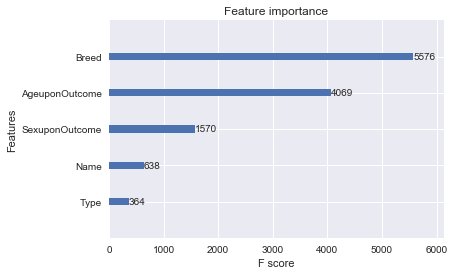

In [50]:
xgb.plot_importance(xgbr)